In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
raw_df = pd.read_csv("./Dataset/Clean.csv")

In [3]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df)

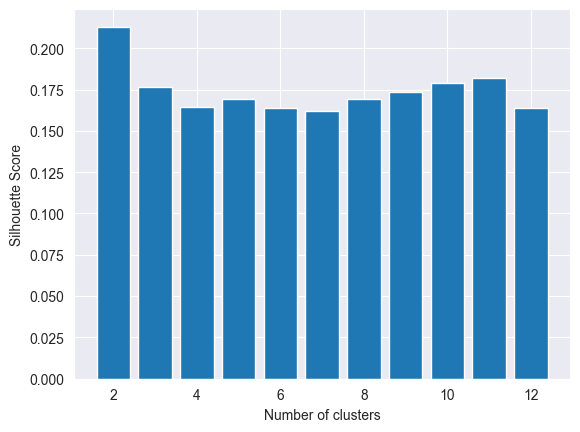

In [4]:
# Find silhouette scores for different amount of clusters
silhouette_scores = [] 
k = []

for n_cluster in range(2, 13):
    silhouette_scores.append( 
        silhouette_score(scaled_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(scaled_df))) 
    k.append(n_cluster)
k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

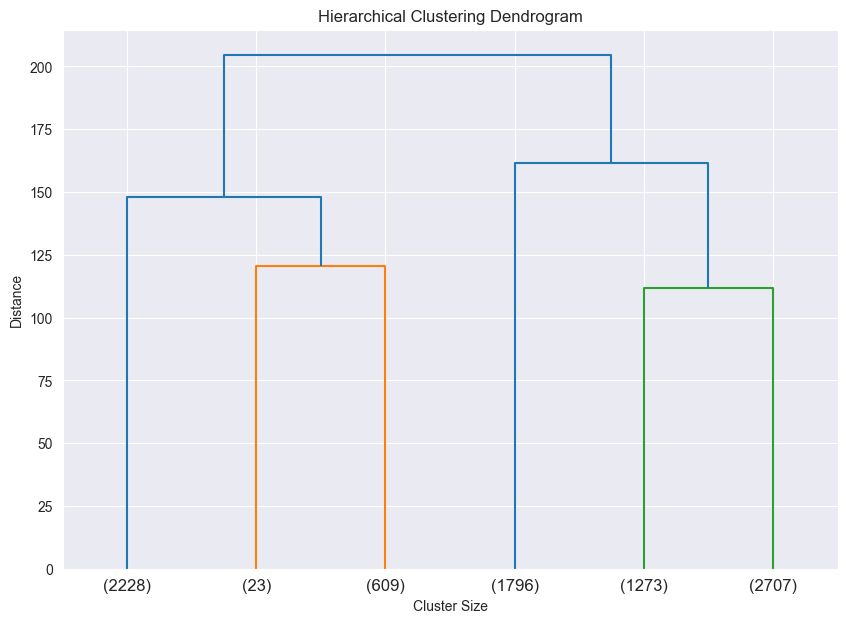

In [41]:
linkage_matrix = shc.linkage(scaled_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
shc.dendrogram(linkage_matrix, truncate_mode='lastp', p=6)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

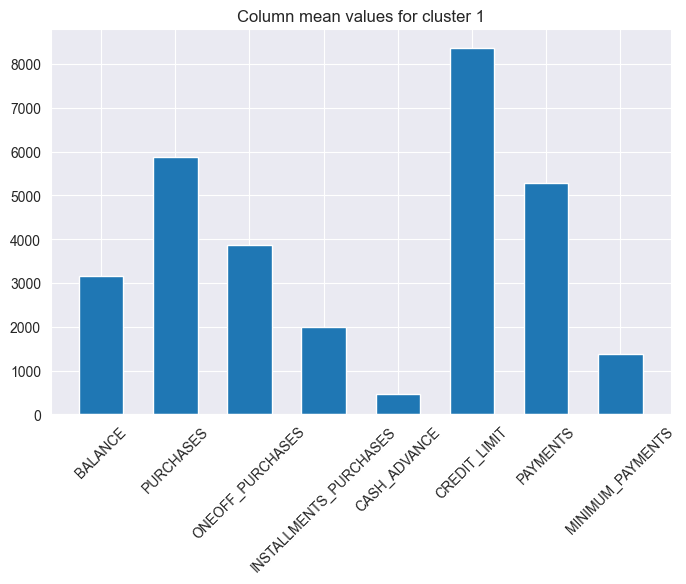

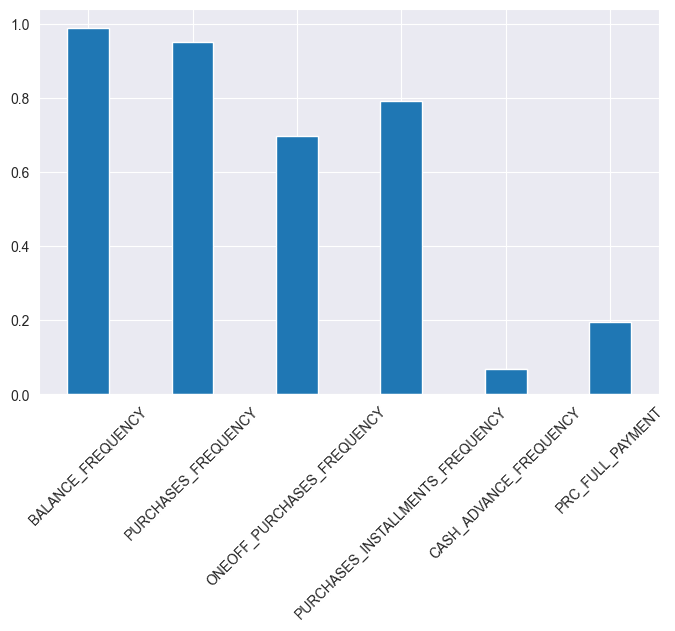

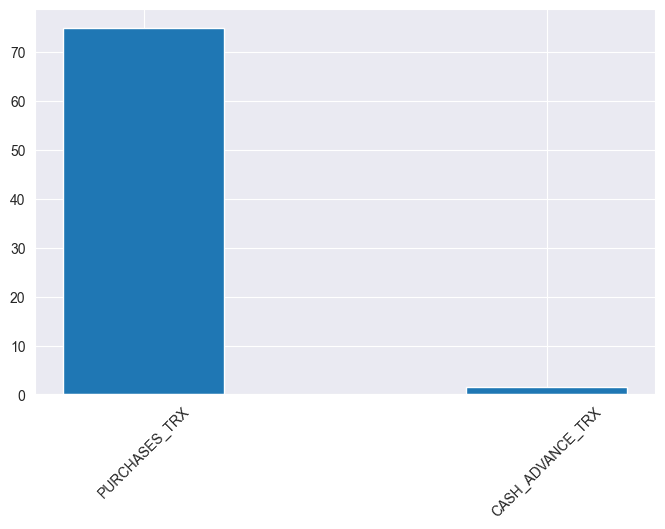

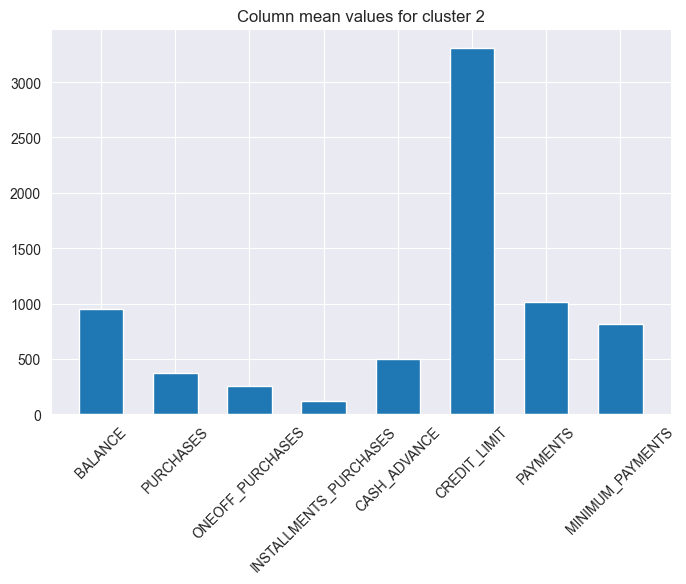

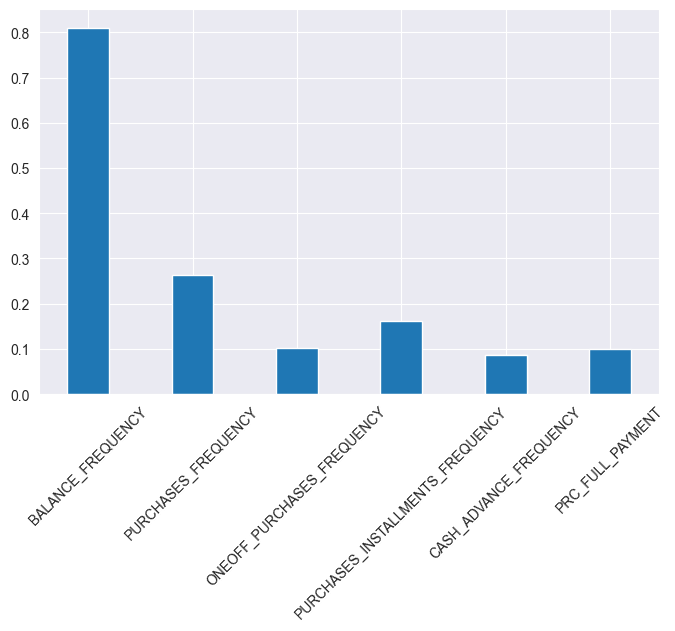

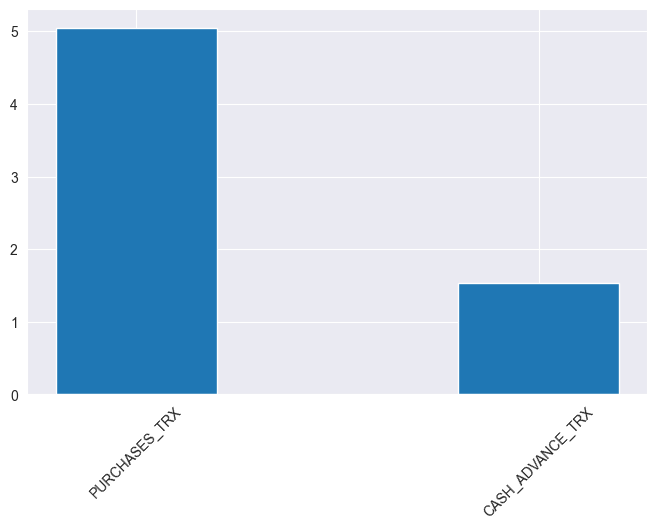

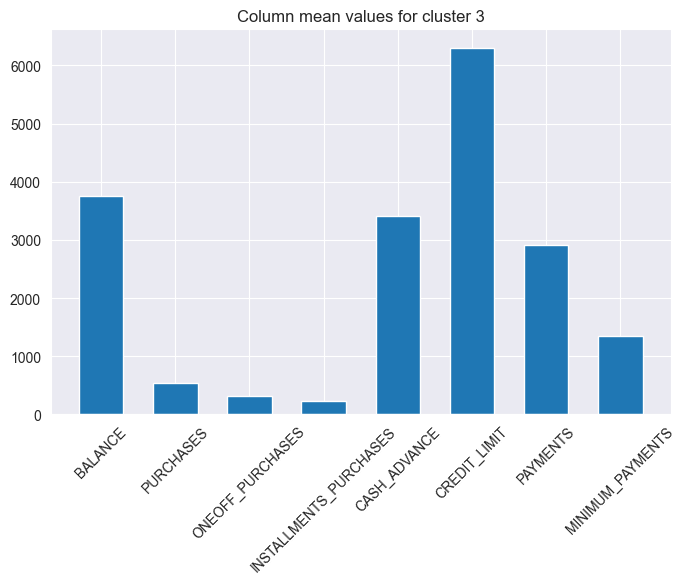

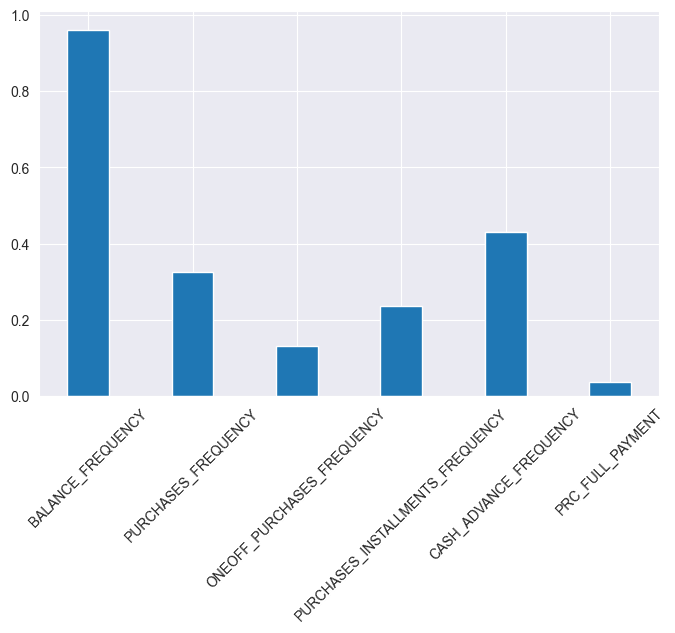

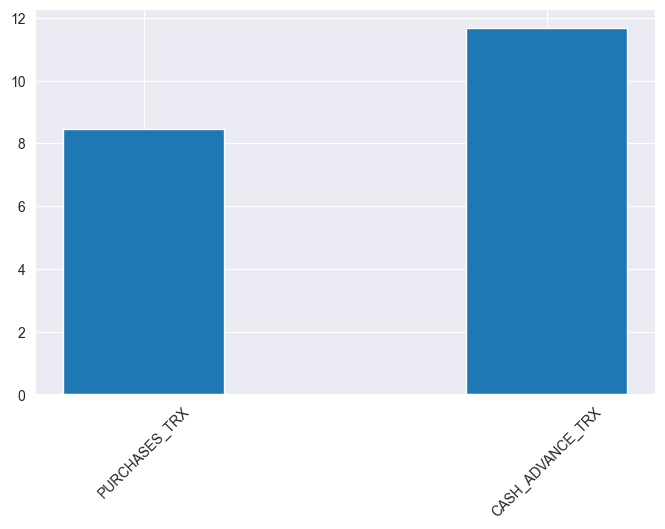

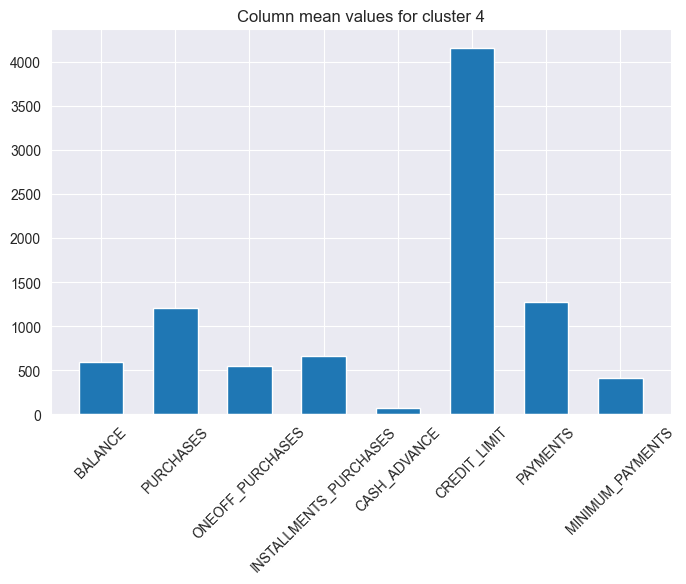

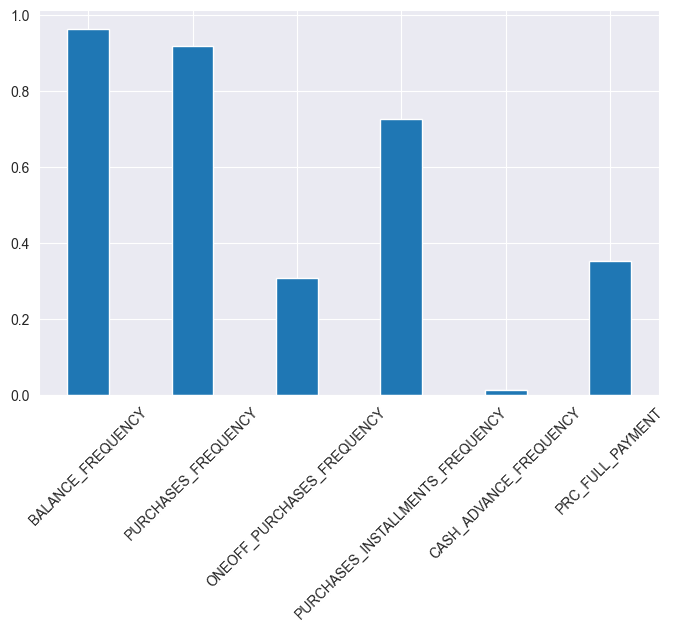

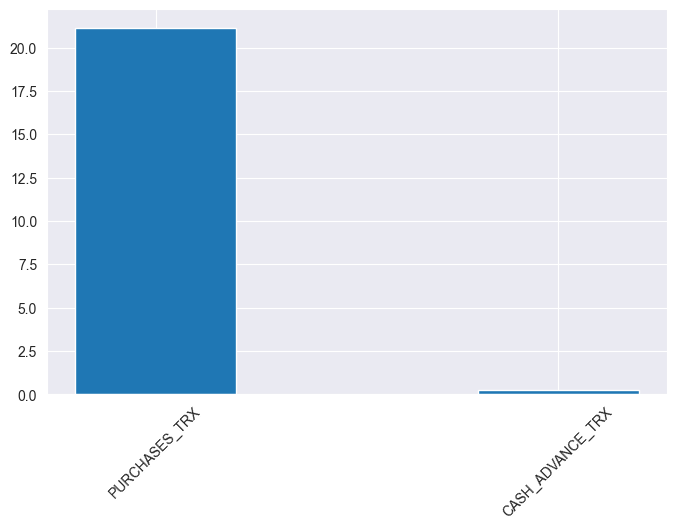

In [48]:
plot1_cols = ["BALANCE", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
plot2_cols = ["BALANCE_FREQUENCY", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "PRC_FULL_PAYMENT"]
plot3_cols = ["PURCHASES_TRX", "CASH_ADVANCE_TRX"]

for i in range(0,4):
    # Create the first plot
    plt.figure(figsize=(8,5))
    plt.title(f'Column mean values for cluster {i + 1}', fontsize = 12)
    values = []
    for col in plot1_cols:
        values.append(raw_df[raw_df['Cluster'] == i][col].mean())
    plt.bar(plot1_cols, values, width=0.6)
    plt.xticks(rotation=45)
    plt.show()
    
    # Create the second plot
    plt.figure(figsize=(8,5))
    values = []
    for col in plot2_cols:
        values.append(raw_df[raw_df['Cluster'] == i][col].mean())
    plt.bar(plot2_cols, values, width=0.4)
    plt.xticks(rotation=45)
    plt.show()
    
    #Create the third plot
    plt.figure(figsize=(8,5))
    values = []
    for col in plot3_cols:
        values.append(raw_df[raw_df['Cluster'] == i][col].mean())
    plt.bar(plot3_cols, values, width=0.4)
    plt.xticks(rotation=45)
    plt.show()

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        3155.853903           0.989222  5876.237658       3876.941551   
1         950.548738           0.810685   376.408332        252.245744   
2        3753.042840           0.961411   536.139065        311.815189   
3         587.984554           0.965491  1203.255754        542.972899   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                   2000.245475    471.296571             0.949553   
1                    124.600068    503.194403             0.263509   
2                    224.392734   3412.730738             0.326296   
3                    660.382401     69.956129             0.919454   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                      

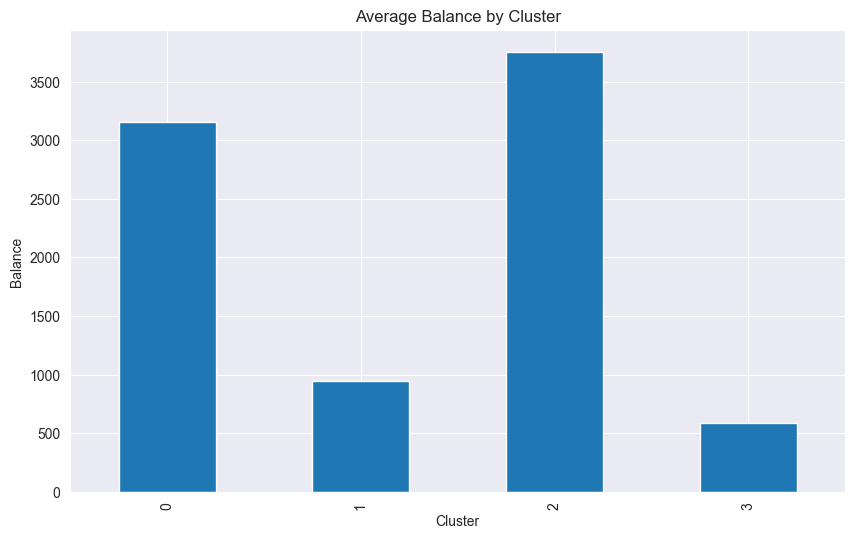

In [6]:
agg = AgglomerativeClustering(n_clusters=4)
c = agg.fit_predict(scaled_df)

raw_df["Cluster"] = pd.Series(c, index=raw_df.index)

cluster_summary = raw_df.groupby('Cluster').mean()

print(cluster_summary)

cluster_summary['BALANCE'].plot(kind='bar', title='Average Balance by Cluster', figsize=(10, 6))
plt.ylabel('Balance')
plt.show()